# Parte 1. Análisis de sentimiento

---
## __Apartado a)__
---

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

#---------------------------
# NAive Bayes 
#---------------------------
from sklearn.naive_bayes import BernoulliNB
# Util para clasificar documentos cortos
from sklearn.naive_bayes import MultinomialNB


from sklearn.tree import DecisionTreeClassifier


In [5]:
file = open("./Datos/yelp_labelled.txt")
dic = {'data':[], 'target':[]}
target_names = ["Negativos", "Positivos"]

corpus = file.readlines() 

for i in range (len(corpus)): 
    dic.get('data').append(corpus[i].split("\t")[0]) #agrega solo las frase
    #[0] ya que divide en una lista de dos elementos y queremos coger donde esta la frase 
    #[1] esta el numero 
    n = int(corpus[i].split("\t")[1].split("\n")[0])
    dic.get('target').append(n)
    
    #cogemos el numero, al hacer una nueva separacion nos devuelve una lista cons dos elementos 
    #el numero esta en la pos 0 
X_train, x_test, y_train, y_test = train_test_split(
    dic.get('data'), dic.get('target'), test_size = 0.25,  random_state=42)

In [309]:
x_test[0]

"If you haven't gone here GO NOW!"

In [310]:
y_test[0]

1

In [308]:
dic.get('data')[0]
dic.get('target')[0]

1

In [256]:
clasificadoresNB = [] 
clasificadoresAD = []

In [257]:
clasificadoresAD_train = []

In [258]:
#Orden de datos:  

#reportNB[0] = Nombre de algoritmo y bolsa  
#reportNB[1] = Exactitud 
#reportNB[2] = Recall
#reportNB[3] = Especificidad
#reportNB[4] = Matriz de confusion 
#reportNB[5] = Reporte de medidas'
#reportNB[6] = Algoritmo
#reportNB[7] = prediccion test 

In [259]:
df_NB = pd.DataFrame({'Nombre': [], 'Exactitud': [], 'Recall': [], 'Especificidad': []})
df_AD = pd.DataFrame({'Nombre': [], 'Exactitud': [], 'Recall': [], 'Especificidad': []})

***
### Bolsa de palabras binaria con monograma


In [260]:
#PRIMERO: 
#Obtenemos la frecuencia de palabras, mediante el diccionario estandar
vecBM = CountVectorizer(stop_words = "english", binary = True, ngram_range = (1,1))
train_vec_data = vecBM.fit_transform(X_train) # SOLO para conjunto de entrenamiento 

test_vec_data = vecBM.transform(x_test)

#### ***Clasificador NaiveBayes***

In [261]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB binario con monograma:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.948
Accuracy test:  0.78


In [262]:
from sklearn.naive_bayes import MultinomialNB

algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.9506666666666667
Accuracy test:  0.764


#### ***Árbol de decisión***

In [263]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
report_train = classification_report(y_train, y_pred_train)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD binario con monograma:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))
    
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9626666666666667
Accuracy test:  0.696


In [264]:
print(report_train)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       372
           1       0.96      0.97      0.96       378

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750



In [265]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vec_data, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data)
y_pred_test = algoritmo.predict(test_vec_data)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.692


---
### Bolsa de palabras binaria con bigrama

In [266]:
vecBB = CountVectorizer(stop_words = "english", binary = True, ngram_range = (1,2))
train_vec_data_bb = vecBB.fit_transform(X_train)

test_vec_data_bb = vecBB.transform(x_test)

#### ***Clasificador NaiveBayes***

In [267]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB binario con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9773333333333334
Accuracy test:  0.78


In [268]:
algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.9773333333333334
Accuracy test:  0.772


#### ***Árbol de decisión*** 

In [269]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)


precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD binario con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.968
Accuracy test:  0.704


In [270]:
target_names2 = ["Pos", "Nega"]

In [271]:
print(report2)

              precision    recall  f1-score   support

         Pos       0.67      0.82      0.74       128
        Nega       0.76      0.58      0.66       122

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



In [272]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vec_data_bb, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vec_data_bb)
y_pred_test = algoritmo.predict(test_vec_data_bb)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.668


----
### Bolsa de palabras TF/IDF con monograma

In [273]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### ***Clasificador NaiveBayes***

In [274]:
vec = CountVectorizer(stop_words = "english", binary = False, ngram_range = (1,1))
train_vec_data = vec.fit_transform(X_train)
tfidfer = TfidfTransformer()
train_vecIDF = tfidfer.fit_transform(train_vec_data) # obtenemos el IDF 



In [275]:
test_vec_data = vec.transform(x_test)

tes_vec_IDF = tfidfer.transform(test_vec_data)

In [276]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB TF/IDF con monograma:",accuracy, recall,precision, matriz,report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.948
Accuracy test:  0.78


In [277]:
algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.9613333333333334
Accuracy test:  0.772


#### ***Árbol de decisión***

In [278]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD TF/IDF con monograma:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9653333333333334
Accuracy test:  0.684


In [279]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF)
y_pred_test = algoritmo.predict(tes_vec_IDF)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.688


---
### Bolsa de palabras TF/IDF con bigrama

#### ***Clasificador NaiveBayes***

In [280]:
vecBi = CountVectorizer(stop_words = "english", binary = False, ngram_range = (1,2))
train_vec_dataBi = vecBi.fit_transform(X_train)
tfidfer = TfidfTransformer()
train_vecIDF_Bi = tfidfer.fit_transform(train_vec_dataBi)



In [281]:
test_vec_data_Bi = vecBi.transform(x_test)
tes_vec_IDF_Bi = tfidfer.transform(test_vec_data_Bi)

In [282]:
algoritmo = BernoulliNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresNB.append(
    ("NB TF/IDF con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))


print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9773333333333334
Accuracy test:  0.78


In [283]:
algoritmo = MultinomialNB()

#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)

#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)


accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9893333333333333
Accuracy test:  0.784


#### ***Árbol de decisión***

In [284]:
algoritmo = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=None)
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

matriz = confusion_matrix(y_test, y_pred_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

clasificadoresAD.append(
    ("AD TF/IDF con bigrama:",accuracy, recall,precision, matriz, report, algoritmo, y_pred_test))

print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9653333333333334
Accuracy test:  0.664


In [285]:
algoritmo = DecisionTreeClassifier()
#Entrenamos al modelo 
algoritmo.fit(train_vecIDF_Bi, y_train)
#Realizo una prediccion 
#Importante: transform SOLO para conjunto de test 
y_pred_train = algoritmo.predict(train_vecIDF_Bi)
y_pred_test = algoritmo.predict(tes_vec_IDF_Bi)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy train: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.9973333333333333
Accuracy test:  0.672


-----
### **Análisis de los resultados**
---

### ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?

Ambos clasificadores reducen la exactitud en el test, esto quiere decir que hay un sobre apredizage del algoritmo. De todso modos, el clasificador Naïve Bayes proporciona mejores resultados que el Árbol de Decisión debido a que el primero hace uso de probabilidad mediante el Teorema de Bayes proporcionando mejores resultados mientras que el otro se basa en generar un arbol mediante nodos que son los que oreguntan por los valores de una varaible tomando un camino aparentemente bueno pero que en etapas posteriores puede que no sea el mejor.
También Naïve Bayes eleva los resultados en el porcentaje de acierto en test. 




## RESULTADOS

In [287]:
## Cramos data frame para visualizar mejor las metricas de los clasificadores 
for i in range (len(clasificadoresNB)): 
    #print(clasificadoresNB[i][0], clasificadoresNB[i][1])
    df_NB = df_NB.append({"Nombre":clasificadoresNB[i][0] ,"Exactitud":clasificadoresNB[i][1], "Recall": clasificadoresNB[i][2], "Especificidad": clasificadoresNB[i][3]}, ignore_index=True)

#print("-------------------------------")

for j in range (len(clasificadoresAD)): 
   #print(clasificadoresAD[j][0], clasificadoresAD[j][1])
    df_AD = df_AD.append({"Nombre":clasificadoresAD[j][0] ,"Exactitud":clasificadoresAD[j][1], "Recall": clasificadoresAD[i][2], "Especificidad": clasificadoresAD[i][3]}, ignore_index=True)


In [292]:
import numpy as np
import matplotlib.pyplot as plt

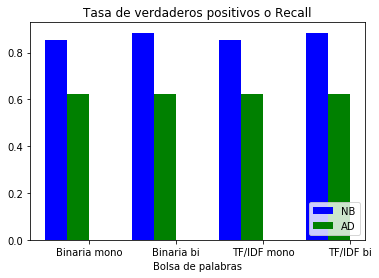

In [293]:
#Recall 
datos = [list(df_NB["Recall"]), list(df_AD["Recall"])]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Tasa de verdaderos positivos o Recall")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

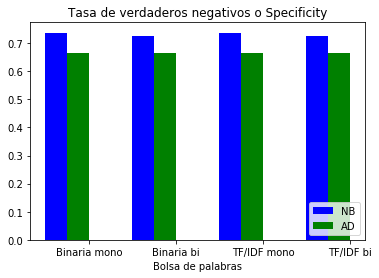

In [294]:
# tasa de verdaderos negativos o specificity
datos = [list(df_NB["Especificidad"]), list(df_AD["Especificidad"])]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Tasa de verdaderos negativos o Specificity")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

Estas dos graficas nos ayuda a ver como el uso de diferentes bolsas de palabras genera resultados muy parecidos para cada uno de los clasificadores. Por lo que se puede decir las bolsas de palabras no genera una mejora considerable

-----
### Análisis de los resultados
---

- #### ¿Hay un clasificador que sea superior al otro? ¿por qué crees que sucede?

Si, el clasificador Naïve Bayes proporciona mejores resultados que el Árbol de Decisión debido a que el primero hace uso de probabilidad mediante el Teorema de Bayes proporcionando mejores resultados mientras que el otro se basa en generar un arbol mediante los nodos que son los que oreguntan por los valores de una varaible tomando un camino aparentemente bueno pero que en etapas posteriores no es el mejor. 


- #### Para cada clasificador, ¿tiene un efecto positivo el añadir “complejidad” a la vectorización? Es decir, añadir bigramas y añadir tf-idf. ¿Por qué crees que sucede este efecto positivo o la falta del mismo?

En lineas geberales presentan valores similares, por lo que no mejoran mucho los resultaods. Puede ser debido a que son corpus pequeños y de jerga local, además el diccionario es inducido por lo que se agregan todos los terminos produciendo ruido. 
Podemos observar esa similitud en el digrama de exactitudes de las 4 bolsas de palabras con los dos clasificadores haciendo una comparación. Se puede ver como las barras son practicamente de una altura similar en las 4 bolsas de palabras. 

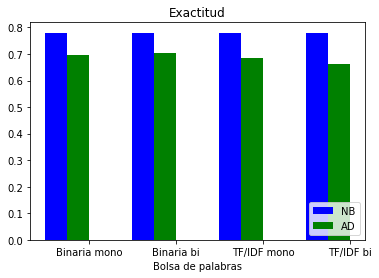

In [295]:
#Exactitud 
exNB= list(df_NB["Exactitud"])
exAD = list(df_AD["Exactitud"])

datos = [exNB, exAD]

X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25, label = "NB")
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25, label = "AD")
plt.xticks(X+0.38, ["Binaria mono","Binaria bi","TF/IDF mono" ,"TF/IDF bi"])
plt.title("Exactitud")
plt.xlabel('Bolsa de palabras')
plt.legend(loc="lower right")

#### __Selecciona el mejor árbol de decisión y obtén las 25 variables con más poder discriminante__ 

In [296]:
def print_top25_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names()
    
    top25 = np.argsort(clf.feature_importances_)[-25:]
    reversed_top = top25[::-1]
    print("Top 25 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))

In [297]:
df_AD

,Nombre,Exactitud,Recall,Especificidad
0,AD binario con monograma:,0.696,0.622951,0.666667
1,AD binario con bigrama:,0.704,0.622951,0.666667
2,AD TF/IDF con monograma:,0.684,0.622951,0.666667
3,AD TF/IDF con bigrama:,0.664,0.622951,0.666667


Podemos ver como los mejores resultados nos los proporcionan los arboles 0 y 1. Elegimos el binario con bigrama

In [298]:
print(clasificadoresAD[1][0])
print(clasificadoresAD[1][6])

AD binario con bigrama:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [299]:
print(clasificadoresAD[1][5])

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       128
           1       0.74      0.61      0.67       122

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



In [300]:
print("Matriz de confusión")
print(clasificadoresAD[1][4])

Matriz de confusión
[[102  26]
 [ 48  74]]


In [301]:
print_top25_features_in_trees(vecBB,clasificadoresAD[1][6])

Top 25 features in the tree

great / good / delicious / nice / amazing / awesome / love / fantastic / friendly / excellent / best / food / vegas / loved / place / perfect / fun / don / restaurants / patio / won disappointed / wonderful / enjoyed / incredible / way


- #### ¿Predominan más las palabras de uno u otro sentimiento? ¿por qué? ¿hay ruido?



Predominan las palabras positivas, posiblemenre porque son las mas frecuentes en los comentarios. Debido a que el diccioanrio usado por los clasificados es generado a partir de los textos de los cometarios. Hay ruido, se puede ver en palabras como "place", "way"... 

####  __Selecciona el mejor clasificador naive bayes y obtén las 25 variables con más presencia en cada clase:__

In [302]:
def print_top25_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    print("Top 25 features per class\n")
    for i, class_label in enumerate(class_labels):
        top25 = np.argsort(clf.feature_log_prob_[i])[-25:]
        reversed_top = top25[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [74]:
df_NB

,Nombre,Exactitud,Recall,Especificidad
0,NB binario con monograma:,0.78,0.852459,0.737589
1,NB binario con bigrama:,0.78,0.885246,0.724832
2,NB TF/IDF con monograma:,0.78,0.852459,0.737589
3,NB TF/IDF con bigrama:,0.78,0.885246,0.724832


In [75]:
print(clasificadoresNB[0][0])
print(clasificadoresNB[0][6])

NB binario con monograma:
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [128]:
clasificadoresNB[0][6].get_params

<bound method BaseEstimator.get_params of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)>

In [77]:
print("Matriz de confusión")
print(clasificadoresAD[0][4])

Matriz de confusión
[[103  25]
 [ 50  72]]


In [79]:
print_top25_features_per_class_in_NB(vecBM,clasificadoresNB[0][6],target_names)       


Top 25 features per class

Negativos: food / place / service / like / don / time / good / bad / really / did / minutes / came / won / disappointed / wasn / bland / got / just / better / going / think / coming / didn / salad / say 

Positivos: great / good / food / place / service / delicious / best / really / nice / friendly / amazing / time / just / love / like / restaurant / vegas / awesome / pretty / staff / menu / prices / fresh / experience / excellent 



- ##### ¿Tienen sentido las palabras seleccionadas? ¿hay ruido (palabras sin sentimiento o de sentimiento opuesto al esperado)? ¿por qué crees que suceden estos fenómenos?

No tienen sentido muchas de las palabras seleccionadas ya que no aparton nada de significado como "g", "ve" además de los verbos que tampoco ayudan en la clasificación. Por otro lado el ruido tambien se puede observar en la clasificacion de las palabras, es decir, aparecen palabras con significado positivo donde las palabras Negativas.

Esto se debe a que el diccionario se optiemne mediante el aprendizage de los mismos textos. Se induce a partir del corpus

### ***Conclusiones generales apartado A***

Primero partimos por el analis de los modelos de clasificación, en ambos modelos se puede apreciar como la precisión en la predicción de los datos de test es mucho menor que en la de entrenamiento (entorno a un 0.2/0.3) esto hace que nuestros modelos no sean precisos debido a que han aprendido mas de la cuenta (sobre aprendizaje). En este caso dado que no usamos un diccionario previo que este bien estructurado, es decir, que contegan palabras que nos puedan dar baste información como lo son los adjetivos sino que usamos un diccionario vacio el cual se va generando solo (induciendo), esto hace que se agregen palabras que carecen de significado haciedno que el analisis quede confuso.

Por ultimo, lo que si se puede apreciar es que el clasificador Naïve Bayes proporciona mejores resultados respecto a la precion del test, hemos usado el Modelo de Bernoulli débido a que son textos cortos y nos sirve para clasificar contenido especifico como es este caso (opinión positiva o negatoiva). Además lo hemos escogido ya que los otros tres tipos de Naïve Bayes hacen mas incapie en las frecuencias debido a que som comentarios de las personas por lo que hacen uso de jerga local además de carecer de un buen diccionario que descarte palabras. 


-------
## Apartado b) 
--------

### 1. Analiza la precisión y la exhaustividad de cada clasificador en cada una de las clases (opiniones positivas y negativas).

- #### Para cada clasificador, ¿tiene un comportamiento homogéneo a la hora de clasificar ambas clases? 

#### Arbol de decisión 

In [82]:
df_AD[1:2]

,Nombre,Exactitud,Recall,Especificidad
1,AD binario con bigrama:,0.708,0.663934,0.675


In [83]:
print(clasificadoresAD[1][5])

              precision    recall  f1-score   support

           0       0.68      0.83      0.74       128
           1       0.76      0.58      0.66       122

    accuracy                           0.71       250
   macro avg       0.72      0.71      0.70       250
weighted avg       0.72      0.71      0.70       250



En este caso no hay homogeniedad a la hora de elegir una de las dos clases, esto lo sabemos gracias a la precisión (precision) también conocida como tasa de verdaderos negativos y a la exhaustividad (recall) también llamada "tasa de verdaderos positivos". Como se puede observar la precisión para ambas clases distan en 0.11 asi que no estan proximas al igual que para el recall que distan en 0.25. 

#### Naïve Bayes 

In [84]:
df_NB[0:1]

,Nombre,Exactitud,Recall,Especificidad
0,NB binario con monograma:,0.78,0.852459,0.737589


In [85]:
print(clasificadoresNB[0][5])

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       128
           1       0.74      0.85      0.79       122

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



Para el clasificador Naïve Bayes hay un poco más de homogeniedad pero igualmente los valores de la precisión y el recoll no son similares para ambas clases.

- #### ¿Cuáles son las fortalezas y debilidades de cada uno de los clasificadores? 

__Naïve Bayes__: 
Por un lado tiene menos coste computacional ya que es mas escalable, es decir, al analaizar textos mas grandes su comportamiento siguie siendo el mismo depende del tipo de N-Grama que usemos bien monogramo que la probabilidad dependa de la palabra anterior o de bigramas que la palabra depende de las dos palabras anteriores.
Es más sencillo de entender dado que se basa en la regla de Bayes. 
Si todos los atributos son independientes puede proporcionar mejores resultados que otros clasificadores. 

Uno de sus puntos debiles es que asume que todos los atributos son independientes
esto no suele ser lo comun en la realidad haciedno que sea menos preciso. 

__Árboles de Decisión__: 
Son fáciles de interpretar puesto que se pueden dibujar el grafo, pueden manejar grandes catidades de datos. ¿¿¿¿¿Es capaz de ignorar datos faltantes debido a que puede tomar otras ramas más prometedoras. ????

Por el contrario, la complejidad depende de la profundidad del arbol, es decir, O(profundidad), no tiene una heristica como tal sino que depende del nodo mas prometedor pudiendo equivocarse de camino y darse cuenta en ramas inferiores. 

# ECHAR UN OJO A LO DE ARBOL DE DECISION CREO QUE SE PUEDE AÑADIR MAS 

- #### ¿Hay algún clasificador que sea mejor que el otro en todo?  

El clasificador Naïve Bayes es mejor para tratar problemas relacionados conla clasificación de textos dado que maneje muy bien grandes cantidades de datos, además de que es rápido

- #### ¿Coinciden ambos clasificadores a la hora de clasificar mejor una clase que la otra? 

Si, ambos tienden a elegir palabras de carcter positivo

### 2. Pinta los 8 primeros niveles del árbol de decisión y comenta lo que ves. 

In [183]:
algoritmo8 = DecisionTreeClassifier(criterion="gini", 
                                   splitter="best",
                                   min_samples_split=10,
                                   max_leaf_nodes=8)

algoritmo8.fit(train_vec_data_bb, y_train)

y_pred_train = algoritmo8.predict(train_vec_data_bb)
y_pred_test = algoritmo8.predict(test_vec_data_bb)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

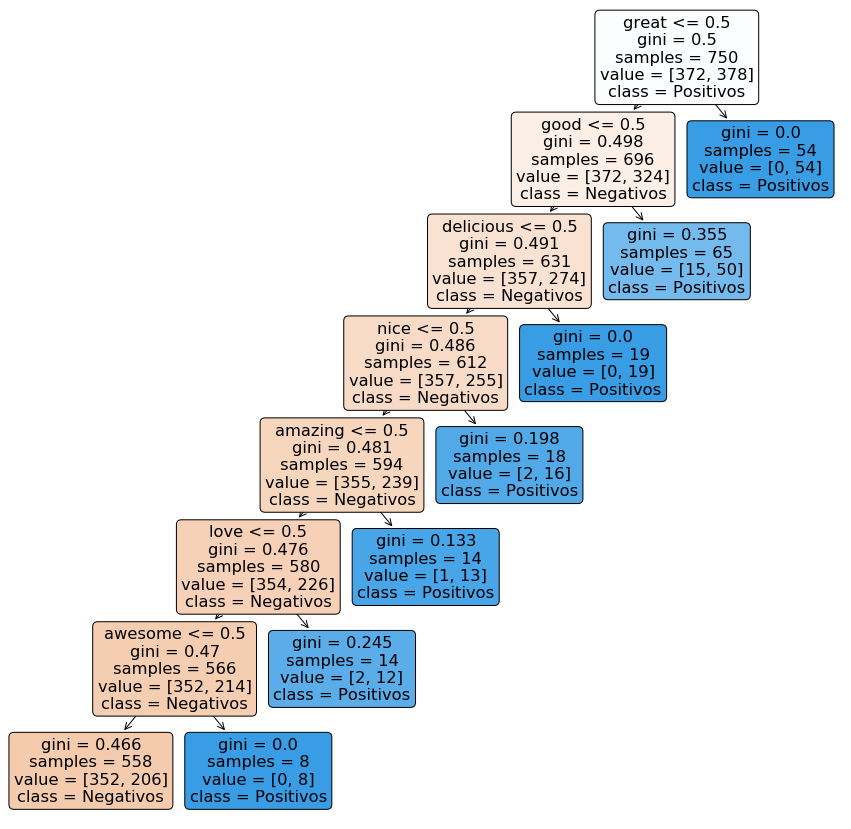

In [98]:
# Pintando árboles con sckit-learn

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vamos a mostrar el árbol de decisión generado usando plot_tree
plt.figure(figsize=(15,15))
plot_tree(algoritmo8, filled=True,class_names=target_names2,feature_names = vecBB.get_feature_names(), rounded=True)
plt.show()

- #### ¿Qué estructura tiene el árbol? 

Tiene una estructura en la cual se explora por la izquierda en preorden, se expanden todas las ramas de la izquierda debido a que son las palabras más discriminantes y por lo tanto los nodos más prometedores.

- #### ¿Cómo interpretas los niveles que has pintado? ¿tienen algún sentido con respecto a la tasa de aciertos, o la precisión y exhaustividad del clasificador? 

Cada, nodo utiliza una palabra para hacer grupos. Por un lado aparecen las frases donde aparece esa palabra y por otro las que no. Esto hace que casa hoja sean grupos clasificados haciendo que todos los elementos sean de una clase u otra. 
Si, tiene algo de sentido que tienda a elegir palabras positivas ya que el recall de la clase "1" es bajo haciedno que los textos tiendan a confundirse con otros. 

Por otro lado, la mala clasificación se debe dado que el modelo de entrenamiento aprende mal, es decir, aprende mas de la cuenta y confunde las palabras puesto que no hay un buen diccionario que descrimine de forma correcta las palabras. 

También como podemos ver que hay mas palabras positivas que negativas esto puede ser debido a que la precisión no es del todo alta. Un precisión baja significa que el casificador no ha sido capaz de encontrar rasgos disntintivos que los diferencie de otros.

Por último, pusto que los valores de la precisión y de la exhaustividad distan entre si bastane, es decir, no son valores similares. Podemos decir que la confusion no es simetrica. 

- #### ¿Hay nodos impuros? 

Si, puesto que la infomracion para ayudar al clasificador por parte del diccionario es escasa pues hay palabras discriminatorias que no ayudan en nada a clasificar aumentando asi la entropia, cuanto mas elevada sea esta mas impuro será un nodo. 

### 3.Por cada clasificador identifica 2 críticas que hayan sido falsas positivas (malas críticas calificadas como buenas) y 2 críticas que han sido falsas negativas (buenas críticas clasificadas como malas). Analiza tanto su texto original, como el vector de palabras resultante (solamente los términos activos).

In [341]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

__Falsas positivas__

1. Creamos un data frame con los datos de test, la frase (x_test), el resultado para esa frase (y_test) y la predicción hecha para estos datos. 

2. Seleccionamos todso los comentarios cuya valoracion haya sido negativa
3. Volvemos a hacer una seleccion de los resultados predichos donde haya sido un 1 (positiva) 

In [336]:
#BAYES
df_predicNB = pd.DataFrame({'Frase': x_test, 'ResultTest': y_test, 'PredictTest': clasificadoresNB[0][7]})
df1 = df_predicNB[df_predicNB['ResultTest'] == 0]
FP_NB = df1[df1['PredictTest'] == 1]


In [338]:
#ARBOLES DE DECISION
df_predicAD = pd.DataFrame({'Frase': x_test, 'ResultTest': y_test, 'PredictTest': clasificadoresAD[1][7]})
df3 = df_predicAD[df_predicAD['ResultTest'] == 0]
FP_AD = df3[df3['PredictTest'] == 1]

__Falsas negativas__

1. Creamos un data frame con los datos de test, la frase (x_test), el resultado para esa frase (y_test) y la predicción hecha para estos datos. 

2. Seleccionamos todso los comentarios cuya valoracion haya sido 1 (positiva) 
3. Volvemos a hacer una seleccion de los resultados predichos donde haya sido un 0 (negativa) 

In [337]:
#BAYES
df2 = df_predicNB[df_predicNB['ResultTest'] == 1]
FN_NB = df2[df2['PredictTest'] == 0]

In [363]:
#ARBOLES DE DECISION 
df4 = df_predicAD[df_predicAD['ResultTest'] == 1]
FN_AD = df4[df4['PredictTest'] == 0]

----

#### ***Clasificador NaiveBayes***

##### ***Falsos Positivos***

In [353]:
FP_NB.head(15)
# Este data frame ayuda a filtar bien las criticas y poder analizar mejor.

,Frase,ResultTest,PredictTest
12,Tried to go here for lunch and it was a madhouse.,0,1
18,The place was not clean and the food oh so stale!,0,1
22,They dropped more than the ball.,0,1
28,The Buffet at Bellagio was far from what I ant...,0,1
40,I go to far too many places and I've never see...,0,1
51,"Now the burgers aren't as good, the pizza whic...",0,1
52,"I have been in more than a few bars in Vegas, ...",0,1
78,The kids play area is NASTY!,0,1
80,Service was slow and not attentive.,0,1
85,The desserts were a bit strange.,0,1


In [343]:
write_terms(vecBM.get_feature_names(), x_test, test_vec_data, 12)


Mensaje 12 : Tried to go here for lunch and it was a madhouse.
Mensaje 12 vectorizado: ['lunch' 'tried'] 



Aqui podemos ver como, dos de las palabras del vecrtor no aportan nada de significado a ala frase, 
me refiero positivo o negativo. Una palabra es un sustantivo mientras que la otra es un verbo. por lo que es dificil acertar en la clasificación

In [354]:
write_terms(vecBM.get_feature_names(), x_test, test_vec_data, 92)


Mensaje 92 : A greasy, unhealthy meal.
Mensaje 92 vectorizado: ['meal'] 



He seleccionado esta porque es muy corta y aun asi, la palabra que hay en el vector no sirve para nada en la clasificación. 

##### __Falsos Negativos__ 

In [355]:
FN_NB.head(10)

,Frase,ResultTest,PredictTest
0,If you haven't gone here GO NOW!,1,0
9,I had a seriously solid breakfast here.,1,0
16,I went to Bachi Burger on a friend's recommend...,1,0
19,All the bread is made in-house!,1,0
23,"Be sure to order dessert, even if you need to ...",1,0
30,"This place is like Chipotle, but BETTER.",1,0
33,Waitress was sweet and funny.,1,0
41,Will be back again!,1,0
45,The goat taco didn't skimp on the meat and wow...,1,0
48,"If you're not familiar, check it out.",1,0


In [356]:
write_terms(vecBM.get_feature_names(), x_test, test_vec_data, 0)

Mensaje 0 : If you haven't gone here GO NOW!
Mensaje 0 vectorizado: ['gone'] 



In [357]:
write_terms(vecBM.get_feature_names(), x_test, test_vec_data, 23)

Mensaje 23 : Be sure to order dessert, even if you need to pack it to-go - the tiramisu and cannoli are both to die for.
Mensaje 23 vectorizado: ['dessert' 'need' 'order' 'sure'] 



Del mismo modo que con los falsos positivos, el vector tiene pabras "muy discriminantes" pero que no ayudan a la hora de la clasificacion ya que carecen de significado de sentimientos positivos o negativos

-----

#### ***Árbol de decisión*** 

##### ***Falsos Positivos***

In [358]:
FP_AD.head(15)

,Frase,ResultTest,PredictTest
12,Tried to go here for lunch and it was a madhouse.,0,1
13,The food wasn't good.,0,1
25,"If it were possible to give them zero stars, t...",0,1
27,Shrimp- When I unwrapped it (I live only 1/2 a...,0,1
40,I go to far too many places and I've never see...,0,1
47,"We got sitting fairly fast, but, ended up wait...",0,1
51,"Now the burgers aren't as good, the pizza whic...",0,1
52,"I have been in more than a few bars in Vegas, ...",0,1
75,"I hate to disagree with my fellow Yelpers, but...",0,1
80,Service was slow and not attentive.,0,1


In [360]:
write_terms(vecBB.get_feature_names(), x_test, test_vec_data_bb, 12)


Mensaje 12 : Tried to go here for lunch and it was a madhouse.
Mensaje 12 vectorizado: ['lunch' 'tried'] 



He cogido la misma critica que con Naïve Bayes para ver si habria algun cambio, pero del mismo modo 
tiene "lunch" y "tried" en el vector. Sin sayudar mucho a la clasificación.

In [361]:
write_terms(vecBB.get_feature_names(), x_test, test_vec_data_bb, 75)


Mensaje 75 : I hate to disagree with my fellow Yelpers, but my husband and I were so disappointed with this place.
Mensaje 75 vectorizado: ['disappointed' 'hate' 'husband' 'place'] 



##### __Falsos Negativos__ 

In [364]:
FN_AD.head(15)

,Frase,ResultTest,PredictTest
0,If you haven't gone here GO NOW!,1,0
9,I had a seriously solid breakfast here.,1,0
16,I went to Bachi Burger on a friend's recommend...,1,0
19,All the bread is made in-house!,1,0
23,"Be sure to order dessert, even if you need to ...",1,0
30,"This place is like Chipotle, but BETTER.",1,0
33,Waitress was sweet and funny.,1,0
41,Will be back again!,1,0
45,The goat taco didn't skimp on the meat and wow...,1,0
48,"If you're not familiar, check it out.",1,0


In [365]:
write_terms(vecBB.get_feature_names(), x_test, test_vec_data_bb, 33)


Mensaje 33 : Waitress was sweet and funny.
Mensaje 33 vectorizado: ['sweet' 'waitress'] 



In [366]:
write_terms(vecBB.get_feature_names(), x_test, test_vec_data_bb, 48)


Mensaje 48 : If you're not familiar, check it out.
Mensaje 48 vectorizado: ['check'] 



- #### ¿Por qué crees que ha fallado el clasificador en cada uno de los casos? 

Porque el diccionario que se usa tiene mucho ruido, hay palabras que no apartan nada pero que estan ahi debido a que es inducido, va creandose el mismo. 
Esto es consecuencia de que el clasificador sobreaprenda. 
El error en la clase de entrenamiento es demasiado bajo, haciedno que nuestro modelo aprenda los datos perfectamente en este caso no es util ya que ha aprendido mas de cuenta hacindo que aprenda ruido

- #### ¿Se te ocurre alguna idea sobre cómo mejorar el clasificador de sentimiento?

Si, podriamos proporcionar un bune diccionario a los clasificadores. Repleto de adjetivos, ademas de un conjunto de expresiones que signifiquen un sentimiento, debido a que los comentarios son escritos por personas actuales que hacen uso de jergas. Ya que frases como esta "Will be back again!" no tiene ningun adjetivo pero tiene una connotación positiva. 